In [1]:
import numpy as np
import pandas as pd
from collections import defaultdict
import os

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use('Cole_2018.mplstyle')

pd.options.display.max_columns=100

In [2]:
# Make directory for saving figures
if not os.path.exists('figs/8'):
    os.makedirs('figs/8')

# A. Schematic theta rhythm

### Asymmetric long burst

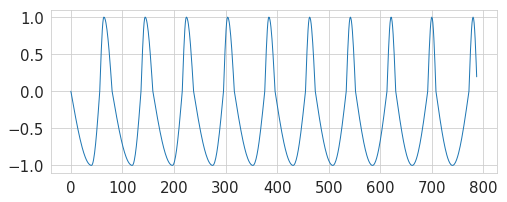

In [3]:
# Simulate a sawtooth waveform with a sharp peak and sharp rise
N_samples_cycle = 80
n_cycles = 10
peak_rise_fracs = np.linspace(.1, .1, n_cycles)
trough_rise_fracs = np.linspace(.2, .4, n_cycles)
peak_decay_fracs = np.linspace(.2, .1, n_cycles)
trough_decay_fracs = np.linspace(.5, .4, n_cycles)

phas = []
for i in range(n_cycles):
    # Make phase array for a single cycle, then repeat it
    pha_one_cycle = np.hstack([
        np.linspace(np.pi/2, np.pi, int(N_samples_cycle * trough_decay_fracs[i]) + 1)[:-1],
        np.linspace(-np.pi, -np.pi/2, int(N_samples_cycle * trough_rise_fracs[i]) + 1)[:-1],
        np.linspace(-np.pi/2, 0, int(N_samples_cycle * peak_rise_fracs[i]) + 1)[:-1],
        np.linspace(0, np.pi/2, int(N_samples_cycle * peak_decay_fracs[i]) + 1)[:-1]])
    phas.append(pha_one_cycle)
phase_t = np.hstack(phas)

# Transform phase into an oscillator
oscillator1 = np.cos(phase_t)

plt.figure(figsize=(8,3))
plt.plot(oscillator1)

### Symmetric short burst

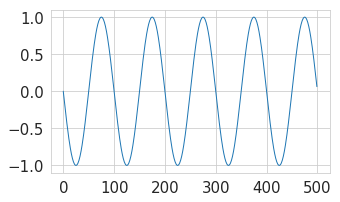

In [4]:
# Simulate a sawtooth waveform with a sharp peak and sharp rise
N_samples_cycle = 100
n_cycles = 5
peak_rise_frac = .25
trough_rise_frac = .25
peak_decay_frac = .25
trough_decay_frac = .25

# Make phase array for a single cycle, then repeat it
pha_one_cycle = np.hstack([
    np.linspace(np.pi/2, np.pi, int(N_samples_cycle * trough_decay_frac) + 1)[:-1],
    np.linspace(-np.pi, -np.pi/2, int(N_samples_cycle * trough_rise_frac) + 1)[:-1],
    np.linspace(-np.pi/2, 0, int(N_samples_cycle * peak_rise_frac) + 1)[:-1],
    np.linspace(0, np.pi/2, int(N_samples_cycle * peak_decay_frac) + 1)[:-1]])
phase_t = np.tile(pha_one_cycle, n_cycles)

# Transform phase into an oscillator
oscillator2 = np.cos(phase_t)

plt.figure(figsize=(5,3))
plt.plot(oscillator2)

### Background noise

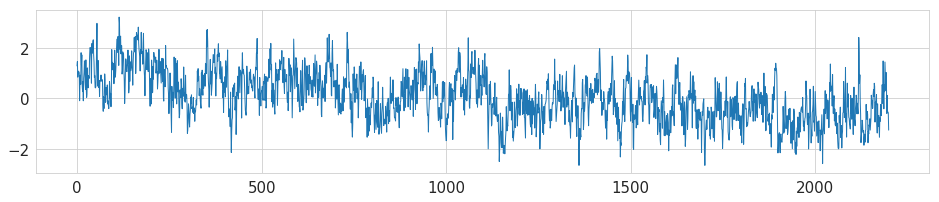

In [5]:
np.random.seed(0)
import neurodsp

bg = neurodsp.sim_variable_powerlaw(4.2, 1000, -1))
bg = bg[1000:-1000]

plt.figure(figsize=(16,3))
plt.plot(bg)

### Add together

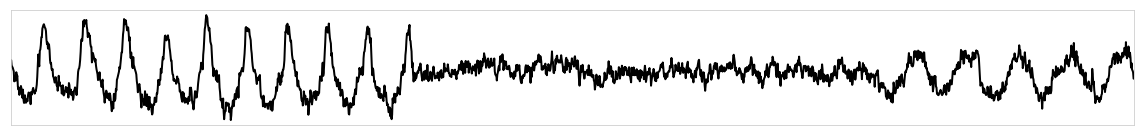

In [6]:
signal = np.copy(bg) * .2
signal[:len(oscillator1)] += oscillator1
signal[-len(oscillator2):] += oscillator2*.5


plt.figure(figsize=(16,2))
plt.plot(signal, 'k', linewidth=2)
plt.xlim((0, len(signal)))
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.savefig('figs/8/signal.png')